<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/logo-bdc.png" align="right" width="64" />

# <span style="color:#336699">Image processing on images obtained through STAC</span>
<hr style="border:2px solid #0077b9;">

<div style="text-align: left;">
    <a href="https://nbviewer.jupyter.org/github/brazil-data-cube/code-gallery/blob/master/jupyter/Python/stac/stac-image-processing.ipynb"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" align="center"/></a>
</div>

<br/>

<div style="text-align: center;font-size: 90%;">
    Rennan Marujo<sup><a href="https://orcid.org/0000-0002-0082-9498"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Gilberto R. Queiroz<sup><a href="https://orcid.org/0000-0001-7534-0219"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Felipe Menino Carlos<sup><a href="https://orcid.org/0000-0002-3334-4315"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:brazildatacube@inpe.br">brazildatacube@inpe.br</a>
    <br/><br/>
    Last Update: May 21, 2024
</div>

<br/>

<div style="text-align: justify;  margin-left: 15%; margin-right: 15%;">
<b>Abstract.</b> This Jupyter Notebook describes how to search for CBERS-4 data products in <em>Brazil Data Cube</em>'s catalog through the STAC service. Then it shows how to use Python libraries to perform some image processing. It starts by computing the Normalized Difference Vegetation Index (NDVI) based on the red and near-infrared spectral bands. Next, it demonstrates a threshold analysis based on the computed NDVI. Lastly, it computes the NDVI difference for images from two diffrent dates.
</div>

<br/>
<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;font-size: 75%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>For an introduction to the SpatioTemporal Asset Catalog (STAC) with the <em>Brazil Data Cube</em> infrastructure, please, refer to the following Jupyter Notebook:</b>
    <div style="margin-left: 10px; margin-right: 10px">
    Zaglia, M.; Marujo, R.; Queiroz, G. R.; Carlos, F. M. <a href="./stac-introduction.ipynb" target="_blank">Introduction to the SpatioTemporal Asset Catalog (STAC)</a>.
    </div>
</div>


<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac.png?raw=true" align="right" width="66"/>

# STAC Client API
<hr style="border:1px solid #0077b9;">

For running the examples in this Jupyter Notebook you will need to install the [STAC client for Python](https://github.com/brazil-data-cube/stac.py). To install it from PyPI using `pip`, use the following command:

In [1]:
!pip install pystac-client

In [2]:
!pip install rasterio shapely matplotlib

In order to access the funcionalities of the client API, you should import the `pystac_client` package, as follows:

In [3]:
import pystac_client

After that, you can check the installed `pystac_client` package version:

In [4]:
pystac_client.__version__

'0.7.5'

Then, create a `pystac_client.Client` object attached to the Brazil Data Cube' STAC service:

In [5]:
service = pystac_client.Client.open('http://senegal.coids.inpe.br/bdc/int/stac/v1/')

# Searching for Sentinel-2 Images
<hr style="border:1px solid #0077b9;">

We are going to use the STAC `search` API to look for images from the data cube named `S2-16D-2`. This data cube is a temporal composite from Sentinel-2/MSI surface reflectance data. Let's define a search box with the following bounds: $x_{min} = -45.9$, $x_{max} = -45.4$, $y_{min} = -12.9$, $y_{max} = -12.6$. Besides that, the period of interest ranges from August 1st, 2018 to July 31st, 2019.

In [6]:
bbox = (-61.7,-9.5,-61.45,-9.25)

In [7]:
item_search = service.search(collections=['S2-16D-2'],
                             bbox=bbox,
                             datetime='2018-08-01/2019-07-31')

In [8]:
item_search

The above query, should return 24 items for this particular data cube:

In [9]:
item_search.matched()

24

# Spectral Indices
<hr style="border:1px solid #0077b9;">

Spectral indices are computed using sensor bands to highlight a certain feature of a target or reduce certain effects. In this context, vegetation indices are spectral indices that enhance characteristics of vegetation, using bands such as Near Infra-red (`NIR`), a region where vegetation shows the most intense reflectance and bands located in red, where the vegetation has the highest absorption of visible sunlight due to the presence in its constitution of the green pigment chlorophyll (Meneses, 2012). The behavior of these spectral bands in some types of targets can be observed below:

<center>
<img src="https://brazil-data-cube.github.io/_images/spectral-profile.png" width="480" />
<br/>
Spectral profile of several targets. Source: modified from Pan et. al (2015).
</center>

# Calculating the Normalized Difference Vegetation Index (NDVI)
<hr style="border:1px solid #0077b9;">

The normalized difference vegetation index (NDVI) is calculated using the **Red** and **Near Infrared** (NIR) spectral bands. It assesses whether or not the target being observed contains live green vegetation. It can be calculated through the following equation:

$$
NDVI = \frac{(NIR - RED)}{(NIR + RED)}
$$

<center><b>Equation 1</b> - NDVI.</center>

We are going to compute the NDVI just with images from the first item:

In [10]:
items = list(item_search.items())

In [11]:
item = items[0]
item

<Item id=S2-16D_V2_014015_20190728>

<div style="text-align: justify;  margin-left: 15%; margin-right: 15%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>Note:</b> Brazil Data Cube already provides the <em>NDVI</em> and <em>EVI</em> alongside with the spectral bands for the data cubes, besides the quality indicators (<em>CLEAROB</em>, <em>PROVENANCE</em>, <em>CMASK</em>, <em>TOTALOB</em>).
</div>

As one can see in the above cell, the `B04` correspond to the red wavelength and `B08` to the near-infrared.

We have implemented a basic `read` method that allows to retrieve part of an image according to a rectangle specified in `EPSG:4326`. The next cells reads the `red` and `nir` bands:

In [12]:
import rasterio
from rasterio.crs import CRS
from rasterio.warp import transform
from rasterio.windows import from_bounds

def read(uri: str, bbox: list, masked: bool = True, crs: str = None):
    """Read raster window as numpy.ma.masked_array."""
    source_crs = CRS.from_string('EPSG:4326')
    if crs:
        source_crs = CRS.from_string(crs)

    # Expects the bounding box has 4 values
    w, s, e, n = bbox
        
    with rasterio.open(uri) as dataset:
        transformer = transform(source_crs, dataset.crs, [w, e], [s, n])
        window = from_bounds(transformer[0][0], transformer[1][0], 
                             transformer[0][1], transformer[1][1], dataset.transform)
        return dataset.read(1, window=window, masked=masked)

In [13]:
red = read(item.assets['B04'].href, bbox=bbox)

<div style="text-align: justify;  margin-left: 15%; margin-right: 15%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>Note:</b> If there are errors because of your pyproj version, you can run the code below as specified in <a  href="https://rasterio.readthedocs.io/en/latest/faq.html#why-can-t-rasterio-find-proj-db-rasterio-from-pypi-versions-1-2-0" target="_blank">rasterio documentation</a> and try again:

       import os
       del os.environ['PROJ_LIB']
</div>

In [14]:
red

masked_array(
  data=[[301, 244, 299, ..., 297, 287, 294],
        [272, 266, 323, ..., 330, 293, 272],
        [222, 233, 279, ..., 355, 306, 280],
        ...,
        [261, 251, 265, ..., 234, 193, 180],
        [271, 240, 257, ..., 241, 214, 220],
        [251, 243, 231, ..., 248, 244, 267]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=0,
  dtype=int16)

In [15]:
nir = read(item.assets['B08'].href, bbox=bbox)

In [16]:
nir

masked_array(
  data=[[2799, 2424, 2886, ..., 2402, 2369, 2521],
        [2522, 2371, 2877, ..., 2421, 2395, 2447],
        [2055, 1966, 2593, ..., 2579, 2615, 2656],
        ...,
        [3025, 2958, 3210, ..., 2552, 2264, 2621],
        [3153, 2689, 2601, ..., 2402, 2133, 2364],
        [2806, 2680, 2433, ..., 2844, 2468, 2403]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=0,
  dtype=int16)

Let's take a look at the retrieved data:

In [17]:
from matplotlib import pyplot as plt

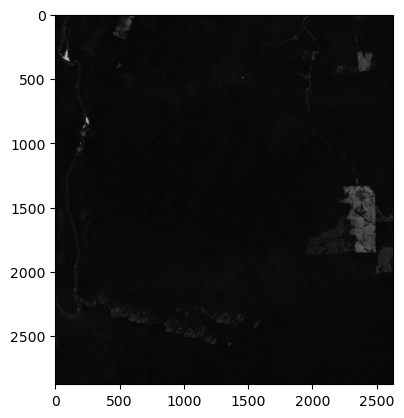

In [18]:
plt.imshow(red, cmap='gray');

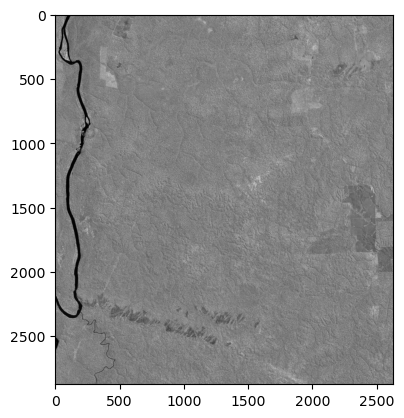

In [19]:
plt.imshow(nir, cmap='gray');

Finally, let's compute the NDVI:

In [20]:
ndvi = (nir - red)/(nir + red)
ndvi

masked_array(
  data=[[0.8058064516129032, 0.8170914542728636, 0.8122448979591836, ...,
         0.7799184883290108, 0.7838855421686747, 0.7911190053285968],
        [0.8052970651395849, 0.7982555934774365, 0.798125, ...,
         0.7600872410032715, 0.7819940476190477, 0.7999264435454211],
        [0.8050065876152833, 0.7880854934060937, 0.8057103064066853, ...,
         0.7580095432856169, 0.7904827114002054, 0.8092643051771117],
        ...,
        [0.8411442483262325, 0.8435649735119976, 0.8474820143884892, ...,
         0.8320172290021536, 0.8428978428978429, 0.8714744734023563],
        [0.8417056074766355, 0.8361215431888016, 0.8201539538138558, ...,
         0.817631479379493, 0.8176395398380912, 0.8297213622291022],
        [0.835786719005561, 0.833732466643859, 0.8265765765765766, ...,
         0.8395860284605433, 0.8200589970501475, 0.8]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False,

Use the Matplotlib to visualize the result array:

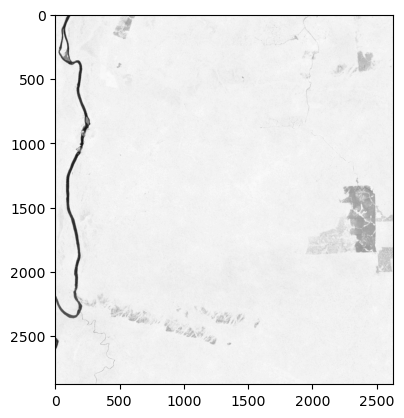

In [21]:
plt.imshow(ndvi, cmap='gray');

We can also plot using other colormaps:

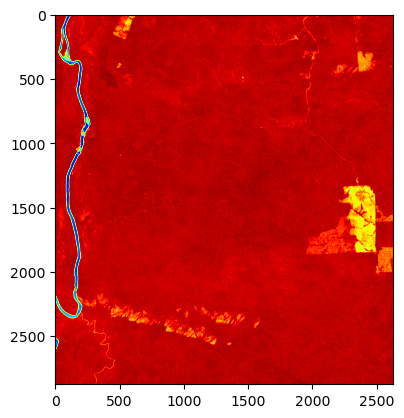

In [22]:
plt.imshow(ndvi, cmap='jet');

For more colormaps check https://matplotlib.org/stable/tutorials/colors/colormaps.html

# Histogram
<hr style="border:1px solid #0077b9;">

The histogram of a digital image, also known as frequency distribution, is the graphic representation in columns showing the intensity of values and the number of pixels with such intensity and is the basis for several types of digital image processing (Gonzalez & Woods, 2007). Some types of histogram can be observed below:

<center>
<img src="https://brazil-data-cube.github.io/_images/histogram.png" width="480" />
<br/>
Four types of images: dark, bright, low contrast and high contrast, and their respective histograms. Source: (Gonzalez & Woods, 2007).
</center>

# Thresholding images
<hr style="border:1px solid #0077b9;">

Digital image Classification is a broad topic and basically consists of assigning labels to targets in a dataset, also called classes. Although many of the classification approaches are complex, there are some simple approaches to solving certain problems, such as thresholding.

The idea of assigning a class following a threshold assumes that the data can be separated by a simple "line", this can be seen in the next figures in a histogram:


<center>
<img src="https://scikit-image.org/docs/dev/_images/sphx_glr_plot_multiotsu_001.png" width="960" />
<br/>
Histogram limiarization example. Source: <a href="https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html">scikit-image doc</a>
</center>

Let's try to separate our data into groups according to their NDVI values.
But first let's see how the image histogram behaves:

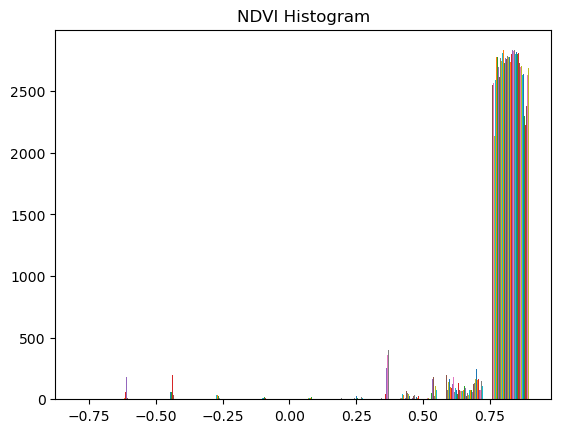

In [23]:
plt.title("NDVI Histogram")
plt.hist(ndvi)
plt.show()

Supposing we can separate the `ndvi` image with threshold, we would assume for this specific case that:
* all pixels with values below 0.2 are dark pixels;
* all pixels above 0.45 are areas containing a good portion of vegetation.
* all pixels with values from 0.2 to 0.45 are areas with few vegetation;

We can perform this thresholding by selecting in the ndvi matrix all values belonging to a given range and assigning a common integer value. We assume the following integer values:
* `1`: dark pixels;
* `2`: vigorous vegetation;
* `3`: weak vegetation.

Let's first create a copy of the original ndvi matrix:

In [24]:
labeled_img = ndvi.copy()

Now, we can use the new copy of the ndvi array and assign the values according to each range of values:

In [25]:
labeled_img[ndvi < 0.2] = 1 # < 0.2
labeled_img[ndvi >= 0.2] = 3 # 0.2 - 0.45
labeled_img[ndvi >= 0.45] = 2 # >= 0.45
labeled_img

masked_array(
  data=[[2.0, 2.0, 2.0, ..., 2.0, 2.0, 2.0],
        [2.0, 2.0, 2.0, ..., 2.0, 2.0, 2.0],
        [2.0, 2.0, 2.0, ..., 2.0, 2.0, 2.0],
        ...,
        [2.0, 2.0, 2.0, ..., 2.0, 2.0, 2.0],
        [2.0, 2.0, 2.0, ..., 2.0, 2.0, 2.0],
        [2.0, 2.0, 2.0, ..., 2.0, 2.0, 2.0]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=0)

Finally, let's see the `ndvi` image separated into those labels:

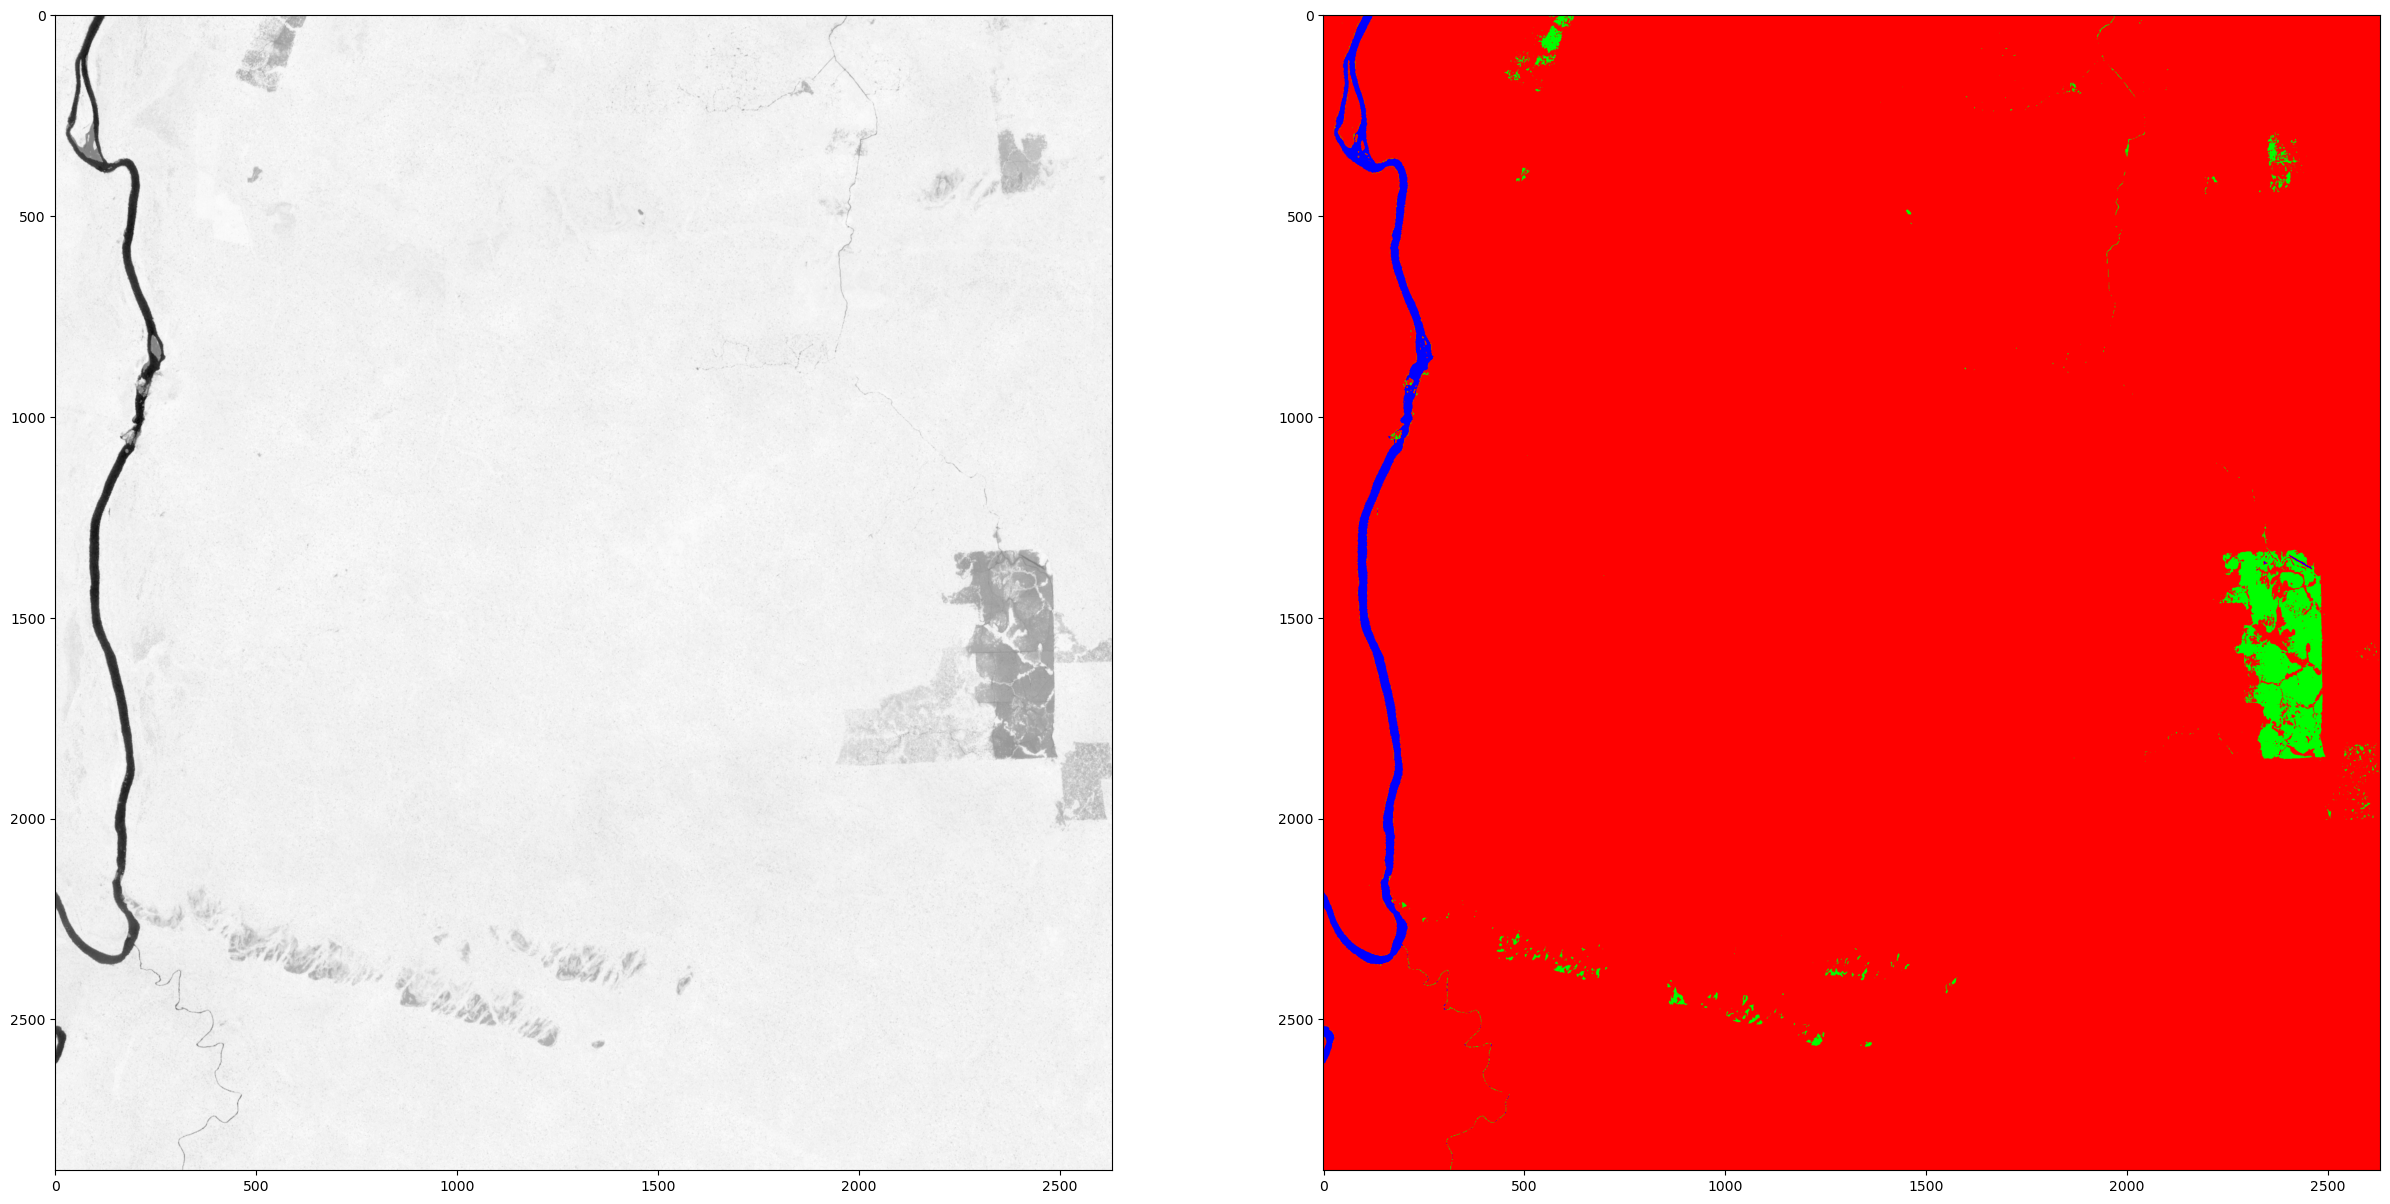

In [26]:
plt.rcParams['figure.figsize'] = [30, 20] #Change plot size
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(ndvi, cmap='gray')
ax2.imshow(labeled_img, cmap='brg');

# Calculating Image Difference
<hr style="border:1px solid #0077b9;">

Now let's suppose we want to compare the NDVI for images from two different dates and same location, for instance to verify the areas where crops have grown and areas that loss vegetation.

For this computation we are going to use the NDVI bands provided in the data cube, and we will select two items (with the same location but with different dates) using STAC.

The first image comprises pixels from July 28th, 2019 to August 12th, 2019 (`2019-07-28_2019-08-12`):

In [27]:
items

[<Item id=S2-16D_V2_014015_20190728>,
 <Item id=S2-16D_V2_014015_20190712>,
 <Item id=S2-16D_V2_014015_20190626>,
 <Item id=S2-16D_V2_014015_20190610>,
 <Item id=S2-16D_V2_014015_20190525>,
 <Item id=S2-16D_V2_014015_20190509>,
 <Item id=S2-16D_V2_014015_20190423>,
 <Item id=S2-16D_V2_014015_20190407>,
 <Item id=S2-16D_V2_014015_20190322>,
 <Item id=S2-16D_V2_014015_20190306>,
 <Item id=S2-16D_V2_014015_20190218>,
 <Item id=S2-16D_V2_014015_20190202>,
 <Item id=S2-16D_V2_014015_20190117>,
 <Item id=S2-16D_V2_014015_20190101>,
 <Item id=S2-16D_V2_014015_20181219>,
 <Item id=S2-16D_V2_014015_20181203>,
 <Item id=S2-16D_V2_014015_20181117>,
 <Item id=S2-16D_V2_014015_20181101>,
 <Item id=S2-16D_V2_014015_20181016>,
 <Item id=S2-16D_V2_014015_20180930>,
 <Item id=S2-16D_V2_014015_20180914>,
 <Item id=S2-16D_V2_014015_20180829>,
 <Item id=S2-16D_V2_014015_20180813>,
 <Item id=S2-16D_V2_014015_20180728>]

In [28]:
first_item = item

In [29]:
first_item

<Item id=S2-16D_V2_014015_20190728>

In [30]:
ndvi_first_image = read(first_item.assets['NDVI'].href, bbox=bbox)

The other selected image comprises pixels from `2018-07-28_2018-08-12` - i.e., one year before the first one selected:

In [31]:
second_item = items[23]

In [32]:
second_item

<Item id=S2-16D_V2_014015_20180728>

In [33]:
ndvi_second_image = read(second_item.assets['NDVI'].href, bbox=bbox)

<div style="text-align: justify;  margin-left: 15%; margin-right: 15%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>Note:</b> NDVI bands precomputed by BDC ranges from <em>-10000</em> to <em>10000</em>, instead of <em>-1</em> to <em>1</em>, as can be seen in the item metadata. This is due to the lower volume required to store files that use 16-bit integer values rather than 32-bit float.
</div>

Considering that these images are from an agricultural area and that crops are normally planted near August (first observation), in a six months, previous or after the first observation, it is expected to find crops, which will imply in greater NDVI values (more vigorous vegetation). This will cause NDVI band to present brighter values on these areas. Using the `gray` colormap, high value NDVI pixels will be more similar to white, while low value NDVI pixels will be closer to the black color.
Based on that, let's visually compare both NDVI images:

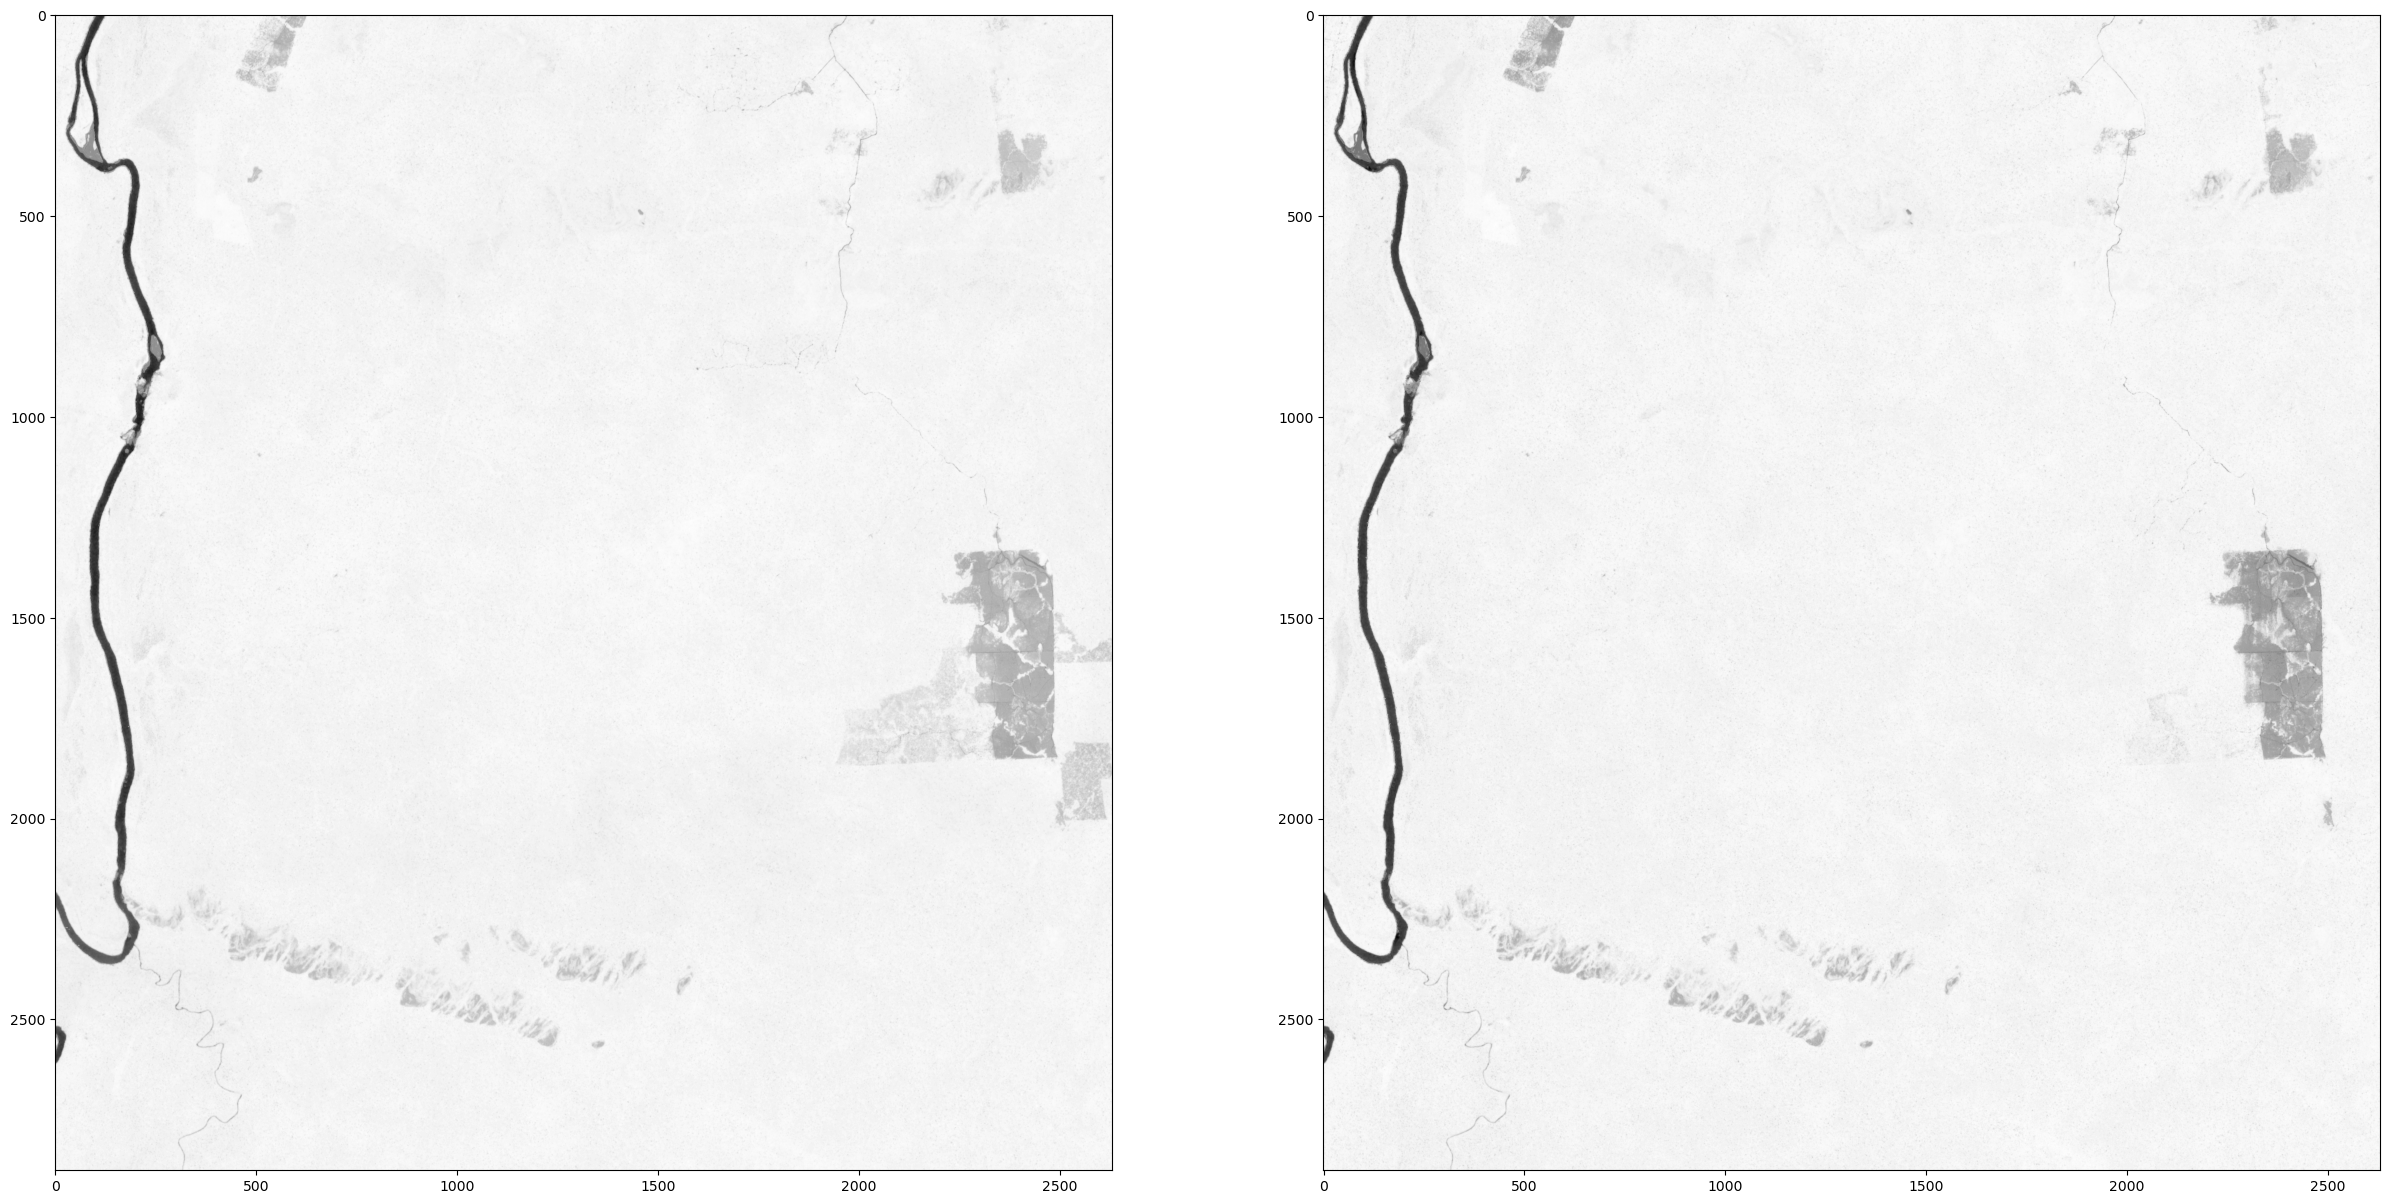

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(ndvi_first_image, cmap='gray')
ax2.imshow(ndvi_second_image, cmap='gray')

Assuming we want to see what have grown and what was loss, let's subtract the most recent image from the oldest one and plot it:

In [35]:
ndvi_diff = ndvi_first_image - ndvi_second_image

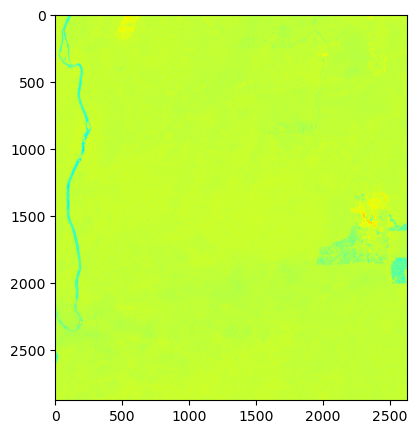

In [36]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(ndvi_diff, cmap='jet');

As can be seen in the the NDVI difference plot, the main changes on pixel values were found in agriculture areas, which was expected due to changes in crops.
The blue values indicate negative values, while red values are positive. This means that for the blue areas there was a loss of vegetation, as a decreasing result on the NDVI value, meaning that crops were harvest. Meanwhile, on the red areas, the NDVI value increased as a result of the more vigorous vegetation on the recent date.

# References
<hr style="border:1px solid #0077b9;">

- [Python Client Library for STAC Service](https://pystac-client.readthedocs.io/en/latest/)

- [Spatio Temporal Asset Catalog Specification](https://stacspec.org/)

# See also the following Jupyter Notebooks
<hr style="border:1px solid #0077b9;">

* [Introduction to the SpatioTemporal Asset Catalog (STAC)](./stac-introduction.ipynb)